In [154]:
# Imports
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns

# Reads and formats datasets
states = gpd.read_file('data/usa-states-census-2014.shp')
states = states.to_crs("EPSG:3395")
dataset = gpd.read_file('zip://cb_2020_us_cousub_500k.zip')
tornados = gpd.read_file('zip://data/1950-2018-torn-initpoint.zip!1950-2018-torn-initpoint')
dataset = dataset.to_crs("EPSG:3395")
tornados = tornados.to_crs("EPSG:3395")

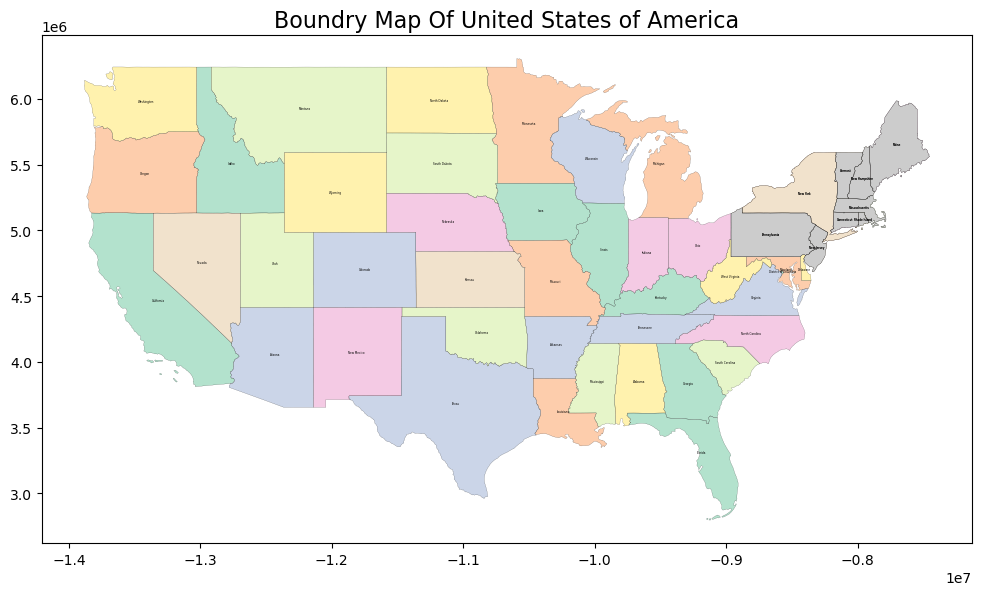

In [155]:
# Plot the USA with state names and boundries.
fig = plt.figure(figsize = (12, 10))
ax = fig.add_subplot()
states.apply(lambda x: ax.annotate(x.NAME, xy=x.geometry.centroid.coords[0], ha = 'center', fontsize=2), axis=1)
states.boundary.plot(ax = ax, color = 'black', linewidth = 0.1, label = 'State Boundaries')
states.plot(ax = ax, cmap = 'Pastel2')
plt.title('Boundry Map Of United States of America', fontsize=16)
plt.savefig('Zachary+Boundry Map Of United States of America.png')
plt.show()

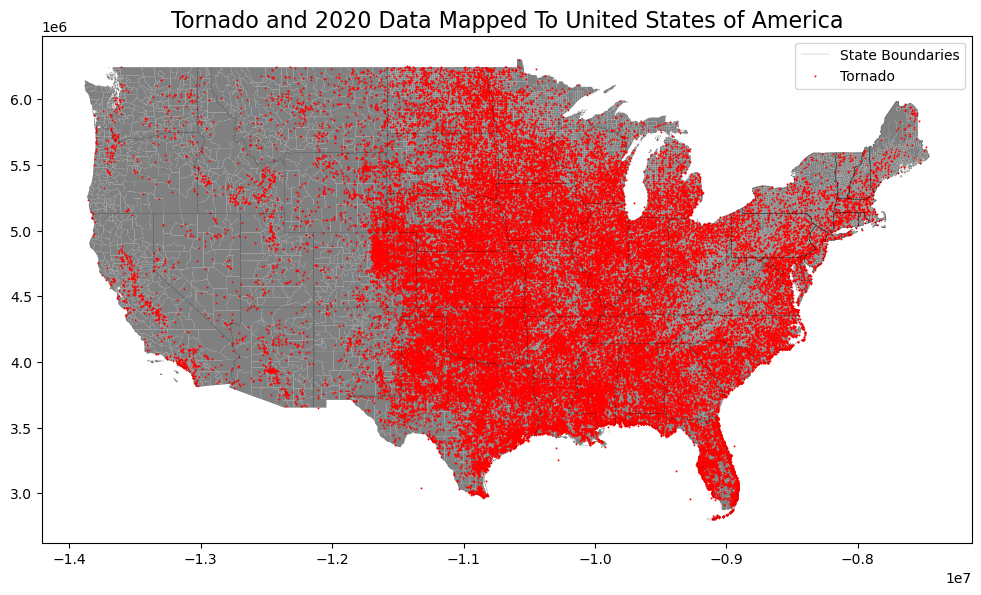

In [156]:
# Targets only the contigous states.
contiguous_states = [
    'AL', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'ID', 'IL', 'IN',
    'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT',
    'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA',
    'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]
dataset = dataset[dataset['STUSPS'].isin(contiguous_states)]
tornados = tornados[tornados['st'].isin(contiguous_states)]

# Plots the USA and the 2020 dataset and tornado dataset together.
fig = plt.figure(1, figsize = (12,10)) 
ax = fig.add_subplot()
states.boundary.plot(ax = ax, color = 'black', linewidth = 0.1, label = 'State Boundaries')
dataset.plot(ax = ax, color = 'grey')
tornados.plot(ax = ax, color = 'red', marker = 'v', markersize = 0.2, label = "Tornado")
plt.title('Tornado and 2020 Data Mapped To United States of America', fontsize=16)
ax.legend()
plt.savefig('Zachary+Tornado and 2020 Data Mapped To United States of America.png')
plt.show()

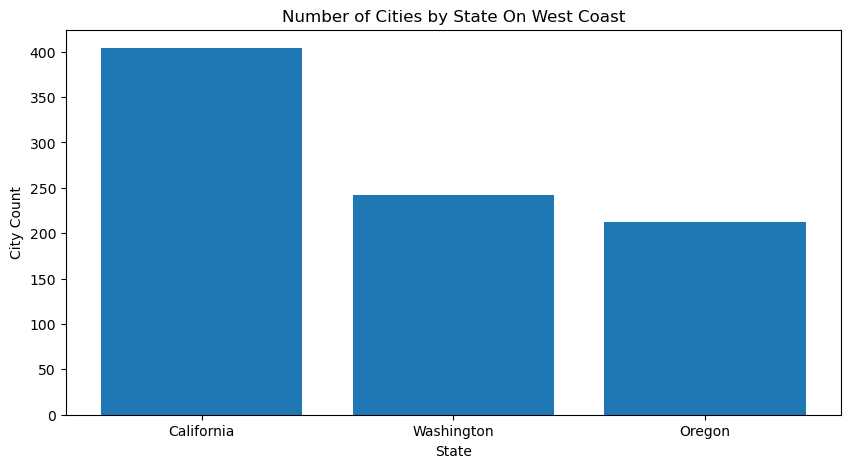

In [157]:
# Shows the count of cities of three different westcoast states. We can see
# that california naturally has the most states.

# Filter out westcoast states using STATEFP value in the dataset.
westcoast_map = {'06': 'California', '41': 'Oregon', '53': 'Washington'}
subset = dataset[dataset['STATEFP'].isin(westcoast_map.keys())]
counts = subset['STATEFP'].value_counts().rename(index = westcoast_map)

plt.figure(figsize=(10, 5))
plt.bar(counts.index, counts.values)
plt.title('Number of Cities by State On West Coast', fontsize=12)
plt.ylabel('City Count', fontsize=10)
plt.xlabel('State', fontsize=10)
plt.savefig('Zachary+Number of Cities by State On West Coast.png')
plt.show()

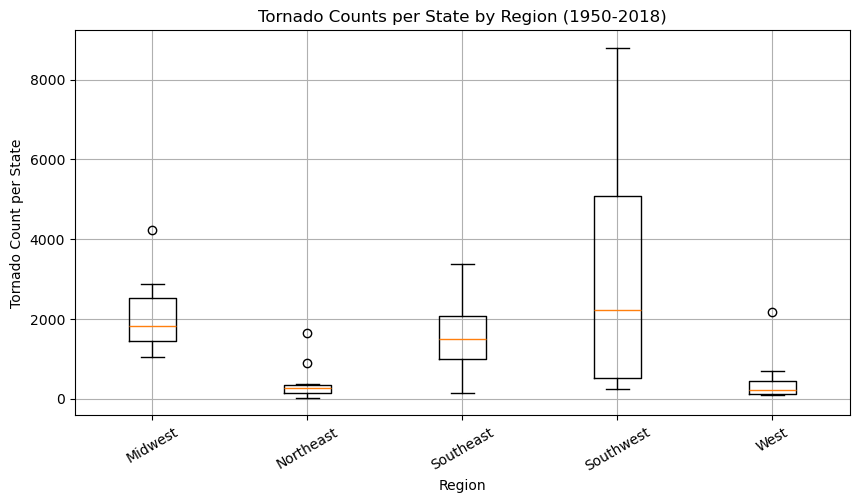

In [158]:
# We can see that the tornado count is highest in the southwest followed by the midwest.

# Copy and mark each tornado occurrence
twisters_by_state = tornados.copy()
twisters_by_state['tornados'] = 1

# Merge twister dataset with USA dataset to make allow for sorting tornados by region data.
twisters_by_state = twisters_by_state.merge(states[['STUSPS', 'region']], how ='left', left_on = 'st', right_on = 'STUSPS')

# Create a count of tornadoes per state.
tornado_counts = twisters_by_state.groupby(['region', 'st'])['tornados'].sum().reset_index()

# Create region data groups of tornado counts.
region_data = []
for name, group in tornado_counts.groupby('region'):
    region_data.append(group['tornados'].values)
# Get region names.
regions = list(tornado_counts['region'].unique())

# Plot region data in boxplot.
plt.figure(figsize = (10, 5))
plt.boxplot(region_data, tick_labels = regions, widths = 0.3)
plt.title('Tornado Counts per State by Region (1950-2018)', fontsize=12)
plt.ylabel('Tornado Count per State', fontsize=10)
plt.xlabel('Region', fontsize=10)
plt.xticks(rotation = 30)
plt.grid(True)
plt.savefig('Zachary+Tornado Counts per State by Region (1950-2018).png')
plt.show()

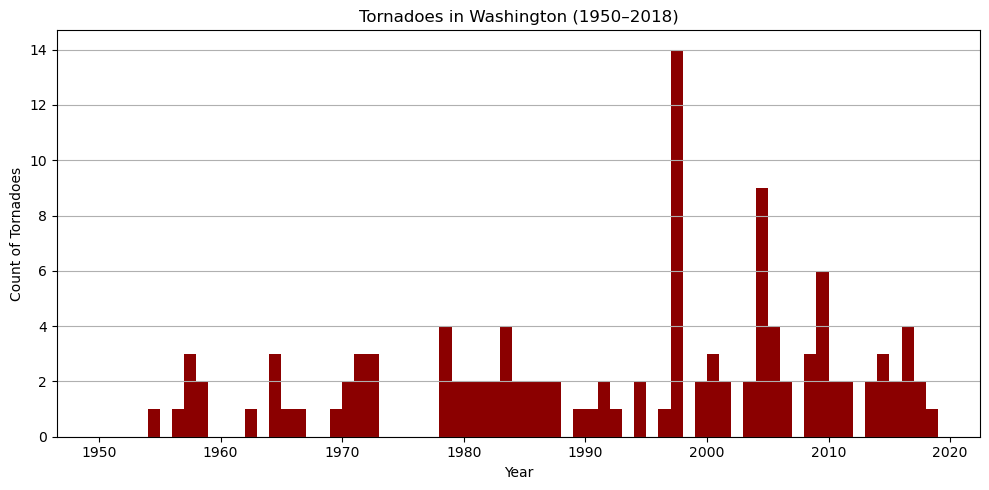

In [159]:
# We can see that the highest tornado count in Washington was just before the 21st century.

# Filter out the tornadoes of Washington.
washington_tornados = tornados[tornados['st'] == 'WA']

# Plot the histogram of tornado counts throughout the years.
plt.figure(figsize = (10, 5))
plt.hist(washington_tornados['yr'], bins=range(1950, 2020), color = 'darkred')
plt.title('Tornadoes in Washington (1950–2018)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count of Tornadoes', fontsize=10)
plt.grid(True, axis = 'y')
plt.tight_layout()
plt.savefig('Zachary+Tornadoes in Washington (1950–2018).png')
plt.show()

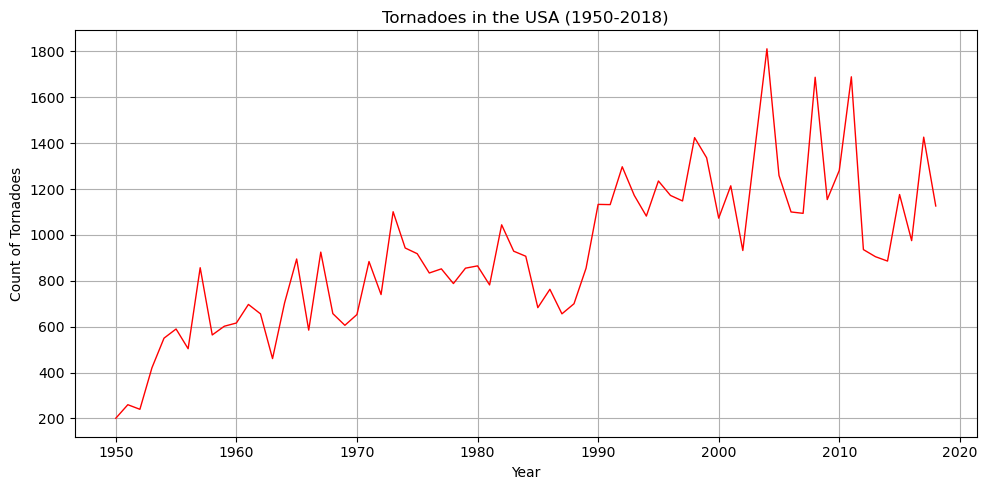

In [160]:
# We can see that the highest tornado count in the USA was just around 2003-2004 with a small drop off
# after. Also notice that the count has gone up and stayed higher in in the 2000s compared to the mid 1900s.

# Group tornados by year and plot the counts.
tornados_by_year = tornados.groupby('yr').size()
plt.figure(figsize=(10, 5))
plt.plot(tornados_by_year.index, tornados_by_year.values, color = 'red', linewidth=1)
plt.title('Tornadoes in the USA (1950-2018)', fontsize=12)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count of Tornadoes', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.savefig('Zachary+Tornadoes in the USA (1950-2018).png')
plt.show()

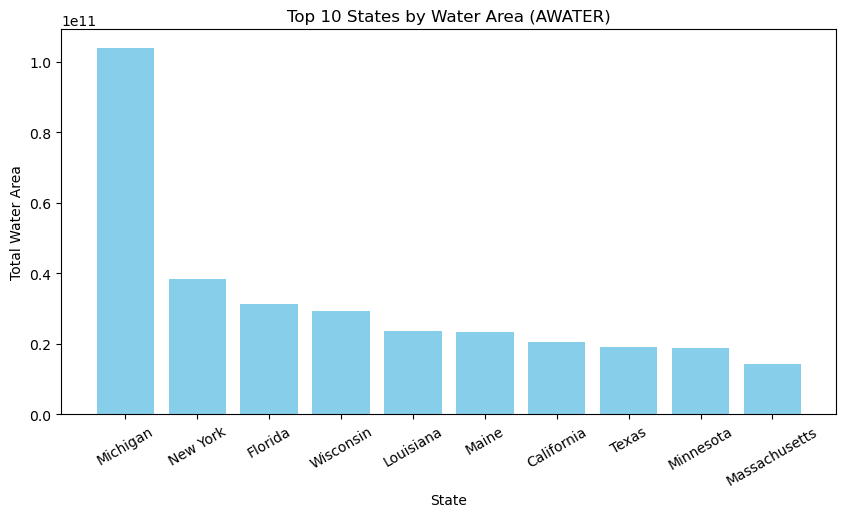

In [161]:
# We can see that the state with the most water by far is Michigan.

# Group by state name and total AWATER value.
awater_totals = states.groupby('NAME')['AWATER'].sum()

# Sort by the top 10 states.
top10 = awater_totals.sort_values(ascending = False).head(10)

# Plot as a bar graph.
plt.figure(figsize = (10, 5))
plt.bar(top10.index, top10.values, color = 'skyblue')
plt.title('Top 10 States by Water Area (AWATER)', fontsize = 12)
plt.ylabel('Total Water Area', fontsize = 10)
plt.xlabel('State', fontsize = 10)
plt.xticks(rotation = 30)
plt.savefig('Zachary+Top 10 States by Water Area (AWATER).png')
plt.show()